In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class AdalineGD():
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1+X. shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):
            output = self.net_input(X)

            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            cost = (errors**2).sum()/2
            self.cost_.append(cost)
            print(self.w_)
        return self

    def net_input(self, X):
        return np. dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) > self.thresholds, 1, -1)

### `__init__()`
**Parameters**

- `eta` : float
    - Learning rate (between 0.0 and 1.0)
- `n_iter` : int
    - Passes over the training dataset

**Attributes**
- `w_` : 1d-array
    - Weights after fitting
- `errors_` : list
    - Number of missclassifications in every epoch
    
### `fit()`
**Parameter**
- `X`:
    - {array-like}, `shape = [n_samples, n_features]` Training vectors, where n_samples is the number of samples and n_features is the number of features
- `y`:
    - array-like, `shape = [n_samples]` Target values
    
**Returns**
- `self` : object

### `net_input()`
- Calculate net input

### `activation()`
- Compute linear activation

### `predict()`
- Return class label after unit step

In [3]:
df = pd.read_csv('../input/iris.data', header=None)

In [4]:
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [5]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [6]:
adal = AdalineGD(eta = 0.01, n_iter = 15).fit(X_std, y)

[0.         0.72829015 0.96995527]
[ 1.47881707e-15 -5.96910515e-02  3.78300208e-01]
[4.88498131e-17 4.20963140e-01 1.01844764e+00]
[ 1.07247544e-15 -9.90857271e-02  6.27969356e-01]
[6.66133815e-17 2.18134617e-01 1.05045145e+00]
[ 7.70494779e-16 -1.25085277e-01  7.92745060e-01]
[9.76996262e-17 8.42726120e-02 1.07157320e+00]
[ 6.07291994e-16 -1.42244362e-01  9.01493109e-01]
[ 1.55431223e-16 -4.07313022e-03  1.08551306e+00]
[ 3.56381591e-16 -1.53568950e-01  9.73264237e-01]
[ 1.33226763e-16 -6.23792207e-02  1.09471303e+00]
[ 2.65343303e-16 -1.61042909e-01  1.02063148e+00]
[ 1.79856130e-16 -1.00859855e-01  1.10078479e+00]
[ 2.24265051e-16 -1.65975545e-01  1.05189273e+00]
[ 1.36557432e-16 -1.26256159e-01  1.10479201e+00]


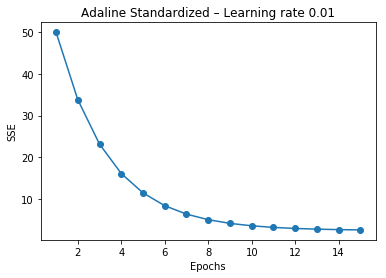

In [7]:
plt.plot(range(1, len(adal.cost_) + 1), adal.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.title('Adaline Standardized – Learning rate 0.01')
plt.show()